**TP NOTÉ**


* **KLIMINA Mariia**
* **LAI Khang Duy**





## **Installing** **dependcies** **and loading data**  🔨

### **Installing libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
import re
import nltk
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap

from ipywidgets import IntProgress

nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /home/laiduy98/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/laiduy98/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### **Loading data**

In [ ]:
url_classic3 = 'data/classic3.csv'
url_classic4 = 'data/classic4.csv'
url_bbc = 'data/bbc.csv'

df_classic3 = pd.read_csv(url_classic3, index_col=0)
df_classic4 = pd.read_csv(url_classic4, index_col=0)
df_bbc = pd.read_csv(url_bbc, index_col=0)

texts_classic3 = df_classic3['text'].values
true_labels_classic3 = df_classic3['label'].values
k_classic3 = len(set(true_labels_classic3))

texts_classic4 = df_classic4['text'].values
true_labels_classic4 = df_classic4['label'].values
k_classic4 = len(set(true_labels_classic4))

texts_bbc = df_classic3['text'].values
true_labels_bbc = df_bbc['label'].values
k_bbc = len(set(true_labels_bbc))

### **Visulalizing data**

**Plotting the number of each label to see if the data is balanced or unbalanced.**

In [ ]:
def plot_number_data(df):
    fig, ax = plt.subplots()
    fig.suptitle("y", fontsize=12)
    df["label"].reset_index().groupby("label").count().sort_values(by="index").plot(kind="barh", legend=False, ax=ax).grid(axis='x')
    plt.show()

**Plotting the classic3 data**

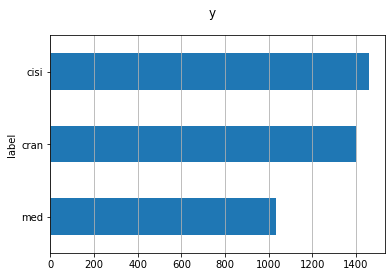

In [ ]:
plot_number_data(df_classic3)

**With classic3 dataset, we can see that the dataset is balanced, so we do not need to do additional manipulations.**

**Plotting the classic4 data**

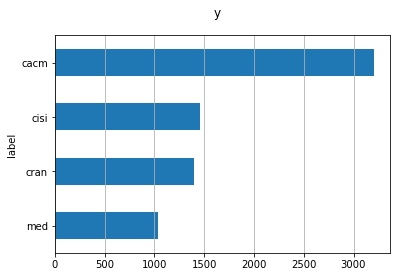

In [ ]:
plot_number_data(df_classic4)

**Plotting the bbc data**

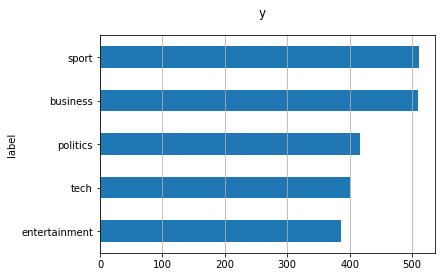

In [ ]:
plot_number_data(df_bbc)

## **Preprocessing** 💻

### **Creating functions**

**In this part we will be manipulating our text-data using the following techiques:**

* Cleaning (remove all punctuations and convert it into Lowercase)
* Tokenizing
* Removing stopwords
* Stemming
* Lemmatisation
* Rejoining the list to one string

In [ ]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

**Creating a list with stop-words such as "the, is, are, this, that" etc.**

In [ ]:
lst_stopwords = list(ENGLISH_STOP_WORDS)
lst_stopwords += ['ca', 'nt', "'s"]

**Creating new columns in our dataset with a clean text**

In [ ]:
def apply_preprocess(df):
    df["text_clean"] = df["text"].apply(lambda x: 
              utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
              lst_stopwords=lst_stopwords))
    return df

### **Printing out dataframes**

In [ ]:
df_classic3 = apply_preprocess(df_classic3)
df_classic3.head()

,text,label,text_clean
0,Milestones in Cataloging In the case of the pr...,cisi,milestone cataloging case present study drlehn...
1,childhood psychosis. a description is given of...,med,childhood psychosis description given diagnost...
2,neonatal hepatitis or familial neonatal obstru...,med,neonatal hepatitis familial neonatal obstructi...
3,Handbook of Comparative Librarianship The firs...,cisi,handbook comparative librarianship written dea...
4,Design and Evaluation of Information Systems T...,cisi,design evaluation information system cojoining...


In [ ]:
df_classic4 = apply_preprocess(df_classic4)
df_classic4.head()

,text,label,text_clean
0,Computer-Aided Analysis and Design of Informat...,cacm,computeraided analysis design information syst...
1,Milestones in Cataloging In the case of the pr...,cisi,milestone cataloging case present study drlehn...
2,childhood psychosis. a description is given of...,med,childhood psychosis description given diagnost...
3,neonatal hepatitis or familial neonatal obstru...,med,neonatal hepatitis familial neonatal obstructi...
4,Handbook of Comparative Librarianship The firs...,cisi,handbook comparative librarianship written dea...


In [ ]:
df_bbc = apply_preprocess(df_bbc)
df_bbc.head()

,text,label,text_clean
0,England coach faces rap after row\n\nEngland c...,sport,england coach face rap row england coach andy ...
1,Moody joins up with England\n\nLewis Moody has...,sport,moody join england lewis moody flown dublin jo...
2,Ferguson fears Milan cutting edge\n\nMancheste...,sport,ferguson fear milan cutting edge manchester un...
3,Henry tipped for Fifa award\n\nFifa president ...,sport,henry tipped fifa award fifa president sepp bl...
4,Arnesen denies rift with Santini\n\nTottenham ...,sport,arnesen denies rift santini tottenham sporting...


### **Printing clean column**

As we can see the data is lower cased, there are not stop-words and all lemmatisation are being deleted. Now, we can work with this data.

In [ ]:
df_classic3['text_clean'][0]

'milestone cataloging case present study drlehnus interested applying method nonstandard way method type literature addressed far proposed begin single monograph subject cataloging apply method citation analysis reference work determine core literature cataloging discovered way innumerable example core literature scientific field obtained journal article science citation index research monograph non scientific subject minimal'

## **Loading GloVe and Word2Vec** 🥁


### **Glove**

**GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.**

In [ ]:
#Installing libraries
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

import os
cwd = os.getcwd()

glove_file = datapath(cwd + '/model/glove.6B/glove.6B.300d.txt')
#loading the model
glove_model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

/home/laiduy98/miniconda3/envs/ds-37-2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/laiduy98/miniconda3/envs/ds-37-2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/home/laiduy98/miniconda3/envs/ds-37-2/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


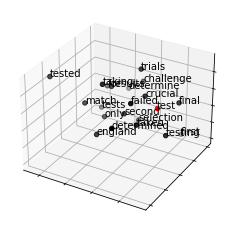

In [ ]:
word = "test"
fig = plt.figure()
## word embedding
tot_words = [word] + [tupla[0] for tupla in 
                 glove_model.most_similar(word, topn=20)]
X = glove_model[tot_words]
## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)
## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1
## plot 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)

In [ ]:
tokenizer = lambda x: x.split()

**Creating a *static_document_embeddings* function for transfering our data to a vector that represents each sentence where each word is mean of an array**

In [ ]:
import warnings

def static_document_embeddings(word_embedding_func, docs, tokenizer, stop_words, n_dims=300):
    """
        Given a set of tokenized sentences, compute the mean vector of w2v vectors for each sentence
    """
    doc_vectors = []
    stop_words = set(stop_words)
    for doc in docs:
        doc = tokenizer(doc)
#         print(doc)
        word_vectors = []
        for word in doc:
            if word not in stop_words:
              vector = word_embedding_func(word)
              if vector is not None:
                  word_vectors.append(vector)
            else:
              pass
        if word_vectors:
            doc_vector = np.array(word_vectors).mean(axis=0)
        else:
            warnings.warn("Zeros returned. Words not in vocabulary \"{}\"".format(doc), Warning)
            # doc_vector = np.array([0] * n_dims)
        
        doc_vectors.append(doc_vector)
    return np.array(doc_vectors)

In [ ]:
def get_glove_vector(word):
  if word in glove_model:
    return glove_model[word]
  else:
    return None

**Loading data**

In [ ]:
X_classic3_glove = static_document_embeddings(get_glove_vector, df_classic3['text_clean'], tokenizer, lst_stopwords)

In [ ]:
X_classic3_glove

array([[ 0.0666683 ,  0.27849522, -0.2594651 , ...,  0.5858151 ,
         0.01604968,  0.00095358],
       [ 0.3032719 ,  0.26647356, -0.2746419 , ...,  0.02954885,
         0.081701  ,  0.31872094],
       [ 0.6375619 ,  0.05491947, -0.08457138, ..., -0.08981895,
         0.20831595,  0.25436142],
       ...,
       [ 0.1482112 ,  0.11755428, -0.15630728, ...,  0.35031033,
         0.09189298, -0.01264162],
       [ 0.43207324,  0.17657289,  0.4906738 , ...,  0.20129465,
        -0.19204319,  0.06961466],
       [ 0.53335065,  0.00988953, -0.20685226, ...,  0.16139278,
         0.00354427,  0.19330588]], dtype=float32)

In [ ]:
X_classic4_glove = np.stack(static_document_embeddings(get_glove_vector, df_classic4['text_clean'], tokenizer, lst_stopwords))

/home/laiduy98/miniconda3/envs/ds-37-2/lib/python3.7/site-packages/ipykernel_launcher.py:23: Warning: Zeros returned. Words not in vocabulary "['neliac']"
/home/laiduy98/miniconda3/envs/ds-37-2/lib/python3.7/site-packages/ipykernel_launcher.py:23: Warning: Zeros returned. Words not in vocabulary "['fdistribution']"


In [ ]:
X_classic4_glove

array([[ 0.39336932,  0.02152182,  0.10151416, ...,  0.6691633 ,
         0.08643926,  0.32789567],
       [ 0.0666683 ,  0.27849522, -0.2594651 , ...,  0.5858151 ,
         0.01604968,  0.00095358],
       [ 0.3032719 ,  0.26647356, -0.2746419 , ...,  0.02954885,
         0.081701  ,  0.31872094],
       ...,
       [ 0.54936254, -0.24176624,  0.22798252, ...,  0.3152875 ,
         0.06305   ,  0.382165  ],
       [ 0.15821147,  0.22030917, -0.2647979 , ...,  0.64697254,
         0.21901128,  0.11328229],
       [-0.15951595,  0.71957004,  0.504225  , ...,  0.28609747,
         0.2877925 ,  0.04667249]], dtype=float32)

In [ ]:
X_bbc_glove = static_document_embeddings(get_glove_vector, df_bbc['text_clean'], tokenizer, lst_stopwords)

In [ ]:
X_bbc_glove

array([[-0.25820303, -0.13478974, -0.3879226 , ...,  0.3805626 ,
         0.02952809,  0.00619421],
       [-0.08114462, -0.04222832, -0.0775778 , ...,  0.02323483,
        -0.0039924 ,  0.13965106],
       [ 0.0070057 ,  0.09582249, -0.11658518, ...,  0.13210335,
         0.09665362, -0.04081834],
       ...,
       [ 0.1290079 , -0.03487277, -0.02556676, ...,  0.43757445,
         0.07006411,  0.17402239],
       [ 0.12700315, -0.02187441, -0.12748595, ...,  0.36077496,
         0.14085938,  0.17584495],
       [ 0.00345802,  0.1480846 ,  0.01904676, ...,  0.22476378,
         0.05496813,  0.21385373]], dtype=float32)

**Scaling the data**

In [ ]:
X_classic3_glove_scaled = StandardScaler().fit_transform(X_classic3_glove)
X_classic4_glove_scaled = StandardScaler().fit_transform(X_classic4_glove)
X_bbc_glove_scaled = StandardScaler().fit_transform(X_bbc_glove)

### **Word2vec**

**Word2vec is a technique for natural language processing published in 2013. The word2vec algorithm uses a neural network model to learn word associations from a large corpus of text. Once trained, such a model can detect synonymous words or suggest additional words for a partial sentence.**

In [ ]:
from gensim.models import KeyedVectors
from gensim import models
from gensim.models import Word2Vec
w2v_model = KeyedVectors.load_word2vec_format('model/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
def get_w2v_vector(word):
  if word in w2v_model:
    return w2v_model[word]
  else:
    return None

In [ ]:
X_w2v_classic3 = static_document_embeddings(get_w2v_vector, df_classic3['text_clean'], tokenizer, lst_stopwords)

In [ ]:
X_w2v_classic4 = static_document_embeddings(get_w2v_vector, df_classic4['text_clean'], tokenizer, lst_stopwords)

/home/laiduy98/miniconda3/envs/ds-37-2/lib/python3.7/site-packages/ipykernel_launcher.py:23: Warning: Zeros returned. Words not in vocabulary "['bendix', 'g20']"
/home/laiduy98/miniconda3/envs/ds-37-2/lib/python3.7/site-packages/ipykernel_launcher.py:23: Warning: Zeros returned. Words not in vocabulary "['cobol']"
/home/laiduy98/miniconda3/envs/ds-37-2/lib/python3.7/site-packages/ipykernel_launcher.py:23: Warning: Zeros returned. Words not in vocabulary "['neliac']"
/home/laiduy98/miniconda3/envs/ds-37-2/lib/python3.7/site-packages/ipykernel_launcher.py:23: Warning: Zeros returned. Words not in vocabulary "['fortran']"
/home/laiduy98/miniconda3/envs/ds-37-2/lib/python3.7/site-packages/ipykernel_launcher.py:23: Warning: Zeros returned. Words not in vocabulary "['fdistribution']"


In [ ]:
X_w2v_bbc = static_document_embeddings(get_w2v_vector, df_bbc['text_clean'], tokenizer, lst_stopwords)

**Scaling the data**

In [ ]:
X_classic3_word2vec_scaled = StandardScaler().fit_transform(X_w2v_classic3)
X_classic4_word2vec_scaled = StandardScaler().fit_transform(X_w2v_classic4)
X_bbc_word2vec_scaled = StandardScaler().fit_transform(X_w2v_bbc)

##Dimension Reduction 🛠


**In this part we will make the dimension reduction using PCA and T-SNE**

### **PCA**

**Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.**

In [ ]:
#setting up number of components
n_components = 38

#setting up model
pca_model = PCA(n_components=n_components, whiten=True, random_state=42)

**Classic3, Glove**

**PCA GLOVE**

In [ ]:
# Clustering after dimension reduction (with whitening)

X_classic3_pca_glove = pca_model.fit_transform(X_classic3_glove_scaled)
X_classic3_pca_glove.shape

(3891, 38)

**Classic4, Glove**

In [ ]:
X_classic4_pca_glove = pca_model.fit_transform(X_classic4_glove_scaled)
X_classic4_pca_glove.shape

(7095, 38)

**BBC, Glove**

In [ ]:
X_bbc_pca_glove = pca_model.fit_transform(X_bbc_glove_scaled)
X_bbc_pca_glove.shape

(2225, 38)

**PCA with word2vec**

**Classic3, Word2Vec**

In [ ]:
X_classic3_pca_w2v = pca_model.fit_transform(X_classic3_word2vec_scaled)
X_classic3_pca_w2v.shape

(3891, 38)

**Classic4, Word2Vec**

In [ ]:
X_classic4_pca_w2v = pca_model.fit_transform(X_classic4_word2vec_scaled)
X_classic4_pca_w2v.shape

(7095, 38)

**BBC, Word2Vec**

In [ ]:
X_bbc_pca_w2v = pca_model.fit_transform(X_bbc_word2vec_scaled)
X_bbc_pca_w2v.shape

(2225, 38)

### **T-SNE**


**T-SNE is t-distributed stochastic neighbor embedding (t-SNE) is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map.**

In [ ]:
tsne_model = manifold.TSNE(perplexity=8, n_components=3, init='random')


**T-SNE GLOVE**

**Classic3, Glove**

In [ ]:
X_classic3_tsne_glove = tsne_model.fit_transform(X_classic3_glove_scaled)
X_classic3_tsne_glove.shape

/home/laiduy98/miniconda3/envs/ds-37-2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(3891, 3)

- Classic4

**Classic4, Glove**

In [ ]:
X_classic4_tsne_glove = tsne_model.fit_transform(X_classic4_glove_scaled)
X_classic4_tsne_glove.shape

/home/laiduy98/miniconda3/envs/ds-37-2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(7095, 3)

**BBC, Glove**

In [ ]:
X_bbc_tsne_glove = tsne_model.fit_transform(X_bbc_glove_scaled)
X_bbc_tsne_glove.shape

/home/laiduy98/miniconda3/envs/ds-37-2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(2225, 3)

**T-SNE with Word2Vec**

**Classic3, Word2Vec**

In [ ]:
X_classic3_tsne_w2v = tsne_model.fit_transform(X_classic3_word2vec_scaled)
X_classic3_tsne_w2v.shape

/home/laiduy98/miniconda3/envs/ds-37-2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(3891, 3)

**Classic4, Word2Vec**

In [ ]:
X_classic4_tsne_w2v = tsne_model.fit_transform(X_classic4_word2vec_scaled)
X_classic4_tsne_w2v.shape

/home/laiduy98/miniconda3/envs/ds-37-2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(7095, 3)

**BBC, Word2Vec**

In [ ]:
X_bbc_tsne_w2v = tsne_model.fit_transform(X_bbc_word2vec_scaled)
X_bbc_tsne_w2v.shape

/home/laiduy98/miniconda3/envs/ds-37-2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(2225, 3)

### **UMAP**


**UMAP is an algorithm for dimension reduction based on manifold learning techniques and ideas from topological data analysis. It provides a very general framework for approaching manifold learning and dimension reduction, but can also provide specific concrete realizations.**

**Setting up model**

In [ ]:
reducer = umap.UMAP(random_state=42,n_components=3)

**Umap, Classic3**

In [ ]:
X_classic3_umap_glove = reducer.fit_transform(X_classic3_glove_scaled)
X_classic3_umap_glove.shape

(3891, 3)

**Umap, Classic4**

In [ ]:
X_classic4_umap_glove = reducer.fit_transform(X_classic4_glove_scaled)
X_classic4_umap_glove.shape

(7095, 3)

**Umap, Classic4**

In [ ]:
X_bbc_umap_glove = reducer.fit_transform(X_bbc_glove_scaled)
X_bbc_umap_glove.shape

(2225, 3)

**At this point, we reduced dimension using three different techniques.**

# **Model training** 👩🏼‍💻



**In this part we will perform model training using different types of dataframes: reduced and raw.** 

## **Kmeans++**


**The Kmeans++ algorithm ensures a smarter initialization of the centroids and improves the quality of the clustering. Apart from initialization, the rest of the algorithm is the same as the standard K-means algorithm. That is K-means++ is the standard K-means algorithm coupled with a smarter initialization of the centroids.**

### **Raw data**

- **Classic3**

In [ ]:
km_model_glove_classic3 = KMeans(n_clusters=k_classic3, random_state=42, n_init=10)
pred_km_classic3_glove = km_model_glove_classic3.fit(X_classic3_glove_scaled).labels_

print(f'NMI score for Glove/Kmean++/Classic3 dataset/not reduced is {round(normalized_mutual_info_score(true_labels_classic3, pred_km_classic3_glove), 3)}')

NMI score for Glove/Kmean++/Classic3 dataset/not reduced is 0.86


- **Classic4**

In [ ]:
km_model_glove_classic4 = KMeans(n_clusters=k_classic4, random_state=42, n_init=10)
pred_km_classic4_glove = km_model_glove_classic4.fit(X_classic4_glove_scaled).labels_

print(f'NMI score for Glove/Kmean++/Classic4 dataset/not reduced is {round(normalized_mutual_info_score(true_labels_classic4, pred_km_classic4_glove), 3)}')

NMI score for Glove/Kmean++/Classic4 dataset/not reduced is 0.606


- **BBC**

In [ ]:
km_model_glove_bbc = KMeans(n_clusters=k_bbc, random_state=42, n_init=10)
pred_km_bbc_glove = km_model_glove_bbc.fit(X_bbc_glove_scaled).labels_

print(f'NMI score for Glove/Kmean++/Classic3 dataset/not reduced is {round(normalized_mutual_info_score(true_labels_bbc, pred_km_bbc_glove), 3)}')

NMI score for Glove/Kmean++/Classic3 dataset/not reduced is 0.79


### **Reduced data**

#### **PCA**


- **Classic3**

In [ ]:
km_model_glove_classic3_pca = KMeans(n_clusters=k_classic3, random_state=42, n_init=10)
pred_km_classic3_glove_pca = km_model_glove_classic3_pca.fit(X_classic3_pca_glove).labels_

print(round(normalized_mutual_info_score(true_labels_classic3, pred_km_classic3_glove_pca), 3))

0.897


- **Classic4**

In [ ]:
km_model_glove_classic4_pca = KMeans(n_clusters=k_classic4, random_state=42, n_init=10)
pred_km_classic4_glove_pca = km_model_glove_classic4_pca.fit(X_classic4_pca_glove).labels_

print(round(normalized_mutual_info_score(true_labels_classic4, pred_km_classic4_glove_pca), 3))

0.62


- **BBC**

In [ ]:
km_model_glove_bbc_pca = KMeans(n_clusters=k_bbc, random_state=42, n_init=10)
pred_km_bbc_glove_pca = km_model_glove_bbc_pca.fit(X_bbc_pca_glove).labels_

print(round(normalized_mutual_info_score(true_labels_bbc, pred_km_bbc_glove_pca), 3))

0.746


#### **T-SNE**

- **Classic 3**

In [ ]:
km_model_glove_classic3_tsne = KMeans(n_clusters=k_classic3, random_state=42, n_init=10)
pred_km_classic3_glove_tsne = km_model_glove_classic3_tsne.fit(X_classic3_tsne_glove).labels_

print(round(normalized_mutual_info_score(true_labels_classic3, pred_km_classic3_glove_tsne), 3))

0.897


- **Classic 4**

In [ ]:
km_model_glove_classic4_tsne = KMeans(n_clusters=k_classic4, random_state=42, n_init=10)
pred_km_classic4_glove_tsne = km_model_glove_classic4_tsne.fit(X_classic4_tsne_glove).labels_

print(round(normalized_mutual_info_score(true_labels_classic4, pred_km_classic4_glove_tsne), 3))

0.566


- **BBC**

In [ ]:
km_model_glove_bbc_tsne = KMeans(n_clusters=k_bbc, random_state=42, n_init=10)
pred_km_bbc_glove_tsne = km_model_glove_bbc_tsne.fit(X_bbc_tsne_glove).labels_

print(round(normalized_mutual_info_score(true_labels_bbc, pred_km_bbc_glove_tsne), 3))

0.821


**#### UMAP**

- **Classic 3**

In [ ]:
km_model_glove_classic3_umap = KMeans(n_clusters=k_classic3, random_state=42, n_init=10)
pred_km_classic3_glove_umap = km_model_glove_classic3_umap.fit(X_classic3_umap_glove).labels_

print(round(normalized_mutual_info_score(true_labels_classic3, pred_km_classic3_glove_umap), 3))

0.931


- **Classic 4**

In [ ]:
km_model_glove_classic4_umap = KMeans(n_clusters=k_classic4, random_state=42, n_init=10)
pred_km_classic4_glove_umap = km_model_glove_classic4_umap.fit(X_classic4_umap_glove).labels_

print(round(normalized_mutual_info_score(true_labels_classic4, pred_km_classic4_glove_umap), 3))

0.679


- **BBC**

In [ ]:
km_model_glove_bbc_umap = KMeans(n_clusters=k_bbc, random_state=42, n_init=10)
pred_km_bbc_glove_umap = km_model_glove_bbc_tsne.fit(X_bbc_umap_glove).labels_

print(round(normalized_mutual_info_score(true_labels_bbc, pred_km_bbc_glove_umap), 3))

0.866


## **Kmedoids**

**K-medoids is a classical partitioning technique of clustering that splits the data set of n objects into k clusters, where the number k of clusters assumed known a priori (which implies that the programmer must specify k before the execution of a k-medoids algorithm).**

### **Raw data**

In [ ]:
from sklearn_extra.cluster import KMedoids
import numpy as np


- **Classic3**

In [ ]:
kmedoids_classic3_glove = KMedoids(n_clusters=k_classic3, random_state=0).fit(X_classic3_glove_scaled)

print(f'NMI score for Glove/Kmedoids/Classic3 dataset/not reduced is {round(normalized_mutual_info_score(true_labels_classic3, kmedoids_classic3_glove.labels_), 3)}')

NMI score for Glove/Kmedoids/Classic3 dataset/not reduced is 0.481


- **Classic4**

In [ ]:
kmedoids_classic4_glove = KMedoids(n_clusters=k_classic4, random_state=0).fit(X_classic4_glove_scaled)

print(f'NMI score for Glove/Kmedoids/Classic3 dataset/not reduced is {round(normalized_mutual_info_score(true_labels_classic4, kmedoids_classic4_glove.labels_), 3)}')

NMI score for Glove/Kmedoids/Classic3 dataset/not reduced is 0.434


- **BBC**

In [ ]:
kmedoids_bbc_glove = KMedoids(n_clusters=k_bbc, random_state=0).fit(X_bbc_glove_scaled)

print(f'NMI score for Glove/Kmedoids/Classic3 dataset/not reduced is {round(normalized_mutual_info_score(true_labels_bbc, kmedoids_bbc_glove.labels_), 3)}')

NMI score for Glove/Kmedoids/Classic3 dataset/not reduced is 0.775


### **Reduced data**

#### **PCA**

- **Classic3**

In [ ]:
kmedoids_classic3_glove = KMedoids(n_clusters=k_classic3, random_state=0).fit(X_classic3_pca_glove)

print(f'NMI score for Glove/Kmedoids/Classic3 dataset/PCA is {round(normalized_mutual_info_score(true_labels_classic3, kmedoids_classic3_glove.labels_), 3)}')

NMI score for Glove/Kmedoids/Classic3 dataset/PCA is 0.014


- **Classic4**

In [ ]:
kmedoids_classic4_glove = KMedoids(n_clusters=k_classic4, random_state=0).fit(X_classic4_pca_glove)

print(f'NMI score for Glove/Kmedoids/Classic3 dataset/PCA is {round(normalized_mutual_info_score(true_labels_classic4, kmedoids_classic4_glove.labels_), 3)}')

NMI score for Glove/Kmedoids/Classic3 dataset/PCA is 0.022


- **BBC**

In [ ]:
kmedoids_bbc_glove = KMedoids(n_clusters=k_bbc, random_state=0).fit(X_bbc_pca_glove)

print(f'NMI score for Glove/Kmedoids/Classic3 dataset/PCA is {round(normalized_mutual_info_score(true_labels_bbc, kmedoids_bbc_glove.labels_), 3)}')

NMI score for Glove/Kmedoids/Classic3 dataset/PCA is 0.17


#### **TSNE**

- **Classic3**

In [ ]:
kmedoids_classic3_glove = KMedoids(n_clusters=k_classic3, random_state=0).fit(X_classic3_tsne_glove)

print(f'NMI score for Glove/Kmedoids/Classic3 dataset/TSNE is {round(normalized_mutual_info_score(true_labels_classic3, kmedoids_classic3_glove.labels_), 3)}')

NMI score for Glove/Kmedoids/Classic3 dataset/TSNE is 0.881


- **Classic4**

In [ ]:
kmedoids_classic4_glove = KMedoids(n_clusters=k_classic4, random_state=0).fit(X_classic4_tsne_glove)

print(f'NMI score for Glove/Kmedoids/Classic4 dataset/TSNE is {round(normalized_mutual_info_score(true_labels_classic4, kmedoids_classic4_glove.labels_), 3)}')

NMI score for Glove/Kmedoids/Classic4 dataset/TSNE is 0.583


- **BBC**

In [ ]:
kmedoids_bbc_glove = KMedoids(n_clusters=k_bbc, random_state=0).fit(X_bbc_tsne_glove)

print(f'NMI score for Glove/Kmedoids/BBC dataset/TSNE is {round(normalized_mutual_info_score(true_labels_bbc, kmedoids_bbc_glove.labels_), 3)}')

NMI score for Glove/Kmedoids/BBC dataset/TSNE is 0.832


#### **UMAP**

- **Classic3**

In [ ]:
kmedoids_classic3_glove = KMedoids(n_clusters=k_classic3, random_state=0).fit(X_classic3_umap_glove)

print(f'NMI score for Glove/Kmedoids/Classic dataset/UMAP is {round(normalized_mutual_info_score(true_labels_classic3, kmedoids_classic3_glove.labels_), 3)}')

NMI score for Glove/Kmedoids/Classic dataset/UMAP is 0.931


- **Classic4**

In [ ]:
kmedoids_classic4_glove = KMedoids(n_clusters=k_classic4, random_state=0).fit(X_classic4_umap_glove)

print(f'NMI score for Glove/Kmedoids/Classic4 dataset/UMAP is {round(normalized_mutual_info_score(true_labels_classic4, kmedoids_classic4_glove.labels_), 3)}')

NMI score for Glove/Kmedoids/Classic4 dataset/UMAP is 0.561


- **BBC**

In [ ]:
kmedoids_bbc_glove = KMedoids(n_clusters=k_bbc, random_state=0).fit(X_bbc_umap_glove)

print(f'NMI score for Glove/Kmedoids/BBC dataset/UMAP is {round(normalized_mutual_info_score(true_labels_bbc, kmedoids_bbc_glove.labels_), 3)}')

NMI score for Glove/Kmedoids/BBC dataset/UMAP is 0.865


## **Spherical Kmeans**


**In spherical k-means, the idea is to set the center of each cluster such that it makes both uniform and minimal the angle between components. The intuition is like looking at stars - the points should have consistent spacing between each other.**

### **Raw data**

- **Classic 4**

In [ ]:
from coclust.clustering import SphericalKmeans
from sklearn.metrics.cluster import adjusted_rand_score


model_spherical_w2v_raw_c4= SphericalKmeans(n_clusters=4,random_state = 42,n_init=10)

model_spherical_w2v_raw_c4.fit(X_w2v_classic4)


pred_raw_w2v_c4 = model_spherical_w2v_raw_c4.labels_

 == New init == 
iteration: 0
5209.56895044156
iteration: 1
5558.788916778549
iteration: 2
5615.270638304867
iteration: 3
5620.880170566591
iteration: 4
5623.2858859119415
iteration: 5
5624.532844141215
iteration: 6
5625.30136087972
iteration: 7
5625.683052992723
iteration: 8
5625.915011700568
iteration: 9
5626.018673923897
iteration: 10
5626.058035719205
iteration: 11
5626.072908452339
iteration: 12
5626.077354104656
iteration: 13
5626.0789410368325
iteration: 14
5626.079130364658
iteration: 15
5626.079348527182
iteration: 16
 == New init == 
iteration: 0
5213.727523712205
iteration: 1
5466.737710142015
iteration: 2
5521.808455329928
iteration: 3
5564.265701439546
iteration: 4
5589.258739032666
iteration: 5
5607.122303615256
iteration: 6
5619.774115394137
iteration: 7
5624.272508358561
iteration: 8
5625.489505569507
iteration: 9
5625.850288259135
iteration: 10
5625.973920737957
iteration: 11
5626.014028178451
iteration: 12
5626.029915773542
iteration: 13
5626.035164804588
iteration: 1

In [ ]:
print(round(normalized_mutual_info_score(true_labels_classic4, pred_raw_w2v_c4), 3))
print(round(adjusted_rand_score(true_labels_classic4, pred_raw_w2v_c4),3))

0.522
0.386


- **Classic 3**

In [ ]:
model_spherical_w2v_raw_c3= SphericalKmeans(n_clusters=4,random_state = 42,n_init=10)

model_spherical_w2v_raw_c3.fit(X_w2v_classic3)
pred_raw_w2v_c3 = model_spherical_w2v_raw_c3.labels_

 == New init == 
iteration: 0
3054.619773855251
iteration: 1
3285.456734723384
iteration: 2
3299.4930711225797
iteration: 3
3300.8253931626705
iteration: 4
3301.3356842005323
iteration: 5
3301.649671873619
iteration: 6
3301.812242428241
iteration: 7
3301.931687611348
iteration: 8
3301.985926374634
iteration: 9
3302.014490948099
iteration: 10
3302.03787427915
iteration: 11
3302.0643503095
iteration: 12
3302.0812103638787
iteration: 13
3302.088795074351
iteration: 14
3302.0959853235154
iteration: 15
3302.103553816074
iteration: 16
3302.1095930874826
iteration: 17
3302.1118100924446
iteration: 18
3302.113389272269
iteration: 19
3302.1137395605024
 == New init == 
iteration: 0
3051.954673868647
iteration: 1
3280.3932399693567
iteration: 2
3292.7741665369144
iteration: 3
3293.395411386593
iteration: 4
3293.58932500649
iteration: 5
3293.696599386118
iteration: 6
3293.803661363604
iteration: 7
3293.898679685705
iteration: 8
3293.980410844608
iteration: 9
3294.0151491098886
iteration: 10
3294.

In [ ]:
print(round(normalized_mutual_info_score(true_labels_classic3, pred_raw_w2v_c3), 3))
print(round(adjusted_rand_score(true_labels_classic3, pred_raw_w2v_c3),3))

0.835
0.865


- **BBC**

In [ ]:
model_spherical_w2v_raw_bbc= SphericalKmeans(n_clusters=4,random_state = 42,n_init=10)

model_spherical_w2v_raw_bbc.fit(X_w2v_bbc)

pred_raw_w2v_bbc = model_spherical_w2v_raw_bbc.labels_

 == New init == 
iteration: 0
1810.535140315894
iteration: 1
1898.8588456096754
iteration: 2
1913.1008683980142
iteration: 3
1915.2555392495617
iteration: 4
1915.6431573737268
iteration: 5
1915.7851963418223
iteration: 6
1915.86019809104
iteration: 7
1915.8991556987287
iteration: 8
1915.9087195569136
iteration: 9
1915.9135184289764
iteration: 10
1915.9157905401728
iteration: 11
1915.9198979909957
iteration: 12
1915.9219555440297
iteration: 13
 == New init == 
iteration: 0
1805.5608688883212
iteration: 1
1866.8048013054863
iteration: 2
1911.0506237134014
iteration: 3
1913.4861308838235
iteration: 4
1914.7737641149015
iteration: 5
1915.694904293096
iteration: 6
1915.873749185787
iteration: 7
1915.9174513895282
iteration: 8
1915.9204386672204
iteration: 9
1915.92195554403
iteration: 10
 == New init == 
iteration: 0
1806.004138458421
iteration: 1
1895.856927573564
iteration: 2
1901.8180274401802
iteration: 3
1904.7247923135378
iteration: 4
1912.9252601327928
iteration: 5
1914.47181149798
i

In [ ]:
print(round(normalized_mutual_info_score(true_labels_bbc, pred_raw_w2v_bbc), 3))
print(round(adjusted_rand_score(true_labels_bbc, pred_raw_w2v_bbc),3))

0.668
0.634


### **Reduced data**

#### **PCA**

- **Classic 4**

In [ ]:
model_spherical_w2v_pca_c4= SphericalKmeans(n_clusters=4,random_state = 42,n_init=10)

model_spherical_w2v_pca_c4.fit(X_classic4_word2vec_scaled)


pred_w2v_c4_pca =model_spherical_w2v_pca_c4.labels_

 == New init == 
iteration: 0
961.9514509663661
iteration: 1
2731.8611965673936
iteration: 2
3228.164181156972
iteration: 3
3269.499226241397
iteration: 4
3271.17194185086
iteration: 5
3271.251079531947
iteration: 6
3271.257602490554
iteration: 7
3271.258828433089
iteration: 8
 == New init == 
iteration: 0
1119.9337345893878
iteration: 1
2569.009190167501
iteration: 2
2882.859066270137
iteration: 3
3024.370716566957
iteration: 4
3047.570496912776
iteration: 5
3052.847066983182
iteration: 6
3055.9658931999447
iteration: 7
3058.0873933814764
iteration: 8
3059.8659598396634
iteration: 9
3061.3429220108965
iteration: 10
3062.5027567663033
iteration: 11
3063.963297848538
iteration: 12
3065.4379169719487
iteration: 13
3067.0614064590172
iteration: 14
3069.2133261214767
iteration: 15
3071.262149962727
iteration: 16
3073.557063758025
iteration: 17
3075.5084152960276
iteration: 18
3077.303811845489
iteration: 19
3079.2085341469196
 == New init == 
iteration: 0
1032.5275534618124
iteration: 1
25

In [ ]:
print(round(normalized_mutual_info_score(true_labels_classic4, pred_w2v_c4_pca), 3))
print(round(adjusted_rand_score(true_labels_classic4, pred_w2v_c4_pca),3))

0.622
0.446


- **Classic 3**

In [ ]:
model_spherical_w2v_pca_c3= SphericalKmeans(n_clusters=5,random_state = 42,n_init=10)

model_spherical_w2v_pca_c3.fit(X_classic3_pca_w2v)


pred_w2v_c3_pca =model_spherical_w2v_pca_c3.labels_
print(round(normalized_mutual_info_score(true_labels_classic3, pred_w2v_c3_pca), 3))
print(round(adjusted_rand_score(true_labels_classic3, pred_w2v_c3_pca),3))

 == New init == 
iteration: 0
722.7231336178984
iteration: 1
864.5613067158939
iteration: 2
894.0276046765134
iteration: 3
924.1430295688923
iteration: 4
956.0387787162028
iteration: 5
986.0311236340474
iteration: 6
1009.0951986585372
iteration: 7
1024.694174647549
iteration: 8
1039.8464235874153
iteration: 9
1057.4048249844323
iteration: 10
1071.36811311674
iteration: 11
1083.6297012485256
iteration: 12
1091.5542175299388
iteration: 13
1098.1477497002654
iteration: 14
1106.2164671387004
iteration: 15
1119.3533501291079
iteration: 16
1125.669638579124
iteration: 17
1127.980198543013
iteration: 18
1129.3361691230637
iteration: 19
1130.835307160924
 == New init == 
iteration: 0
766.5275126038903
iteration: 1
911.0849010038344
iteration: 2
949.9464092936214
iteration: 3
978.3526120601936
iteration: 4
999.6059257429278
iteration: 5
1017.1087119593618
iteration: 6
1033.8887456150214
iteration: 7
1054.2870922025047
iteration: 8
1079.8624451192911
iteration: 9
1099.0509810732392
iteration: 10

In [ ]:
print(round(normalized_mutual_info_score(true_labels_classic3, pred_w2v_c3_pca), 3))
print(round(adjusted_rand_score(true_labels_classic3, pred_w2v_c3_pca),3))

0.587
0.493


- **BBC**

In [ ]:
model_spherical_w2v_pca_bbc= SphericalKmeans(n_clusters=6,random_state = 42,n_init=10)

model_spherical_w2v_pca_bbc.fit(X_bbc_pca_w2v)


pred_w2v_bbc_pca =model_spherical_w2v_pca_bbc.labels_

 == New init == 
iteration: 0
469.52941676417026
iteration: 1
559.5941881143067
iteration: 2
595.1359554647149
iteration: 3
624.5300138543956
iteration: 4
648.3174724071072
iteration: 5
669.9516404127057
iteration: 6
688.525981223019
iteration: 7
703.0243799906054
iteration: 8
712.5010669532796
iteration: 9
727.1552621217104
iteration: 10
738.6840226956255
iteration: 11
744.3079409373537
iteration: 12
746.5839627630176
iteration: 13
747.5779510244049
iteration: 14
748.1457448732
iteration: 15
748.3395796785608
iteration: 16
748.5751413273914
iteration: 17
748.7228858791789
iteration: 18
748.7626694694959
iteration: 19
748.7919615036714
 == New init == 
iteration: 0
491.1743634909094
iteration: 1
587.3722657637766
iteration: 2
632.4128745063935
iteration: 3
656.3685507670344
iteration: 4
668.3833356477063
iteration: 5
676.1820948684759
iteration: 6
681.2804237498502
iteration: 7
687.5803450341659
iteration: 8
694.0396160695216
iteration: 9
698.567972511509
iteration: 10
700.901192514710

In [ ]:
print(round(normalized_mutual_info_score(true_labels_bbc, pred_w2v_bbc_pca), 3))
print(round(adjusted_rand_score(true_labels_bbc, pred_w2v_bbc_pca),3))

0.57
0.509


## **CAH**


**The agglomerative clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity. It’s also known as AGNES (Agglomerative Nesting). The algorithm starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named dendrogram**

### **Raw data**

**Example on BBC dataset**

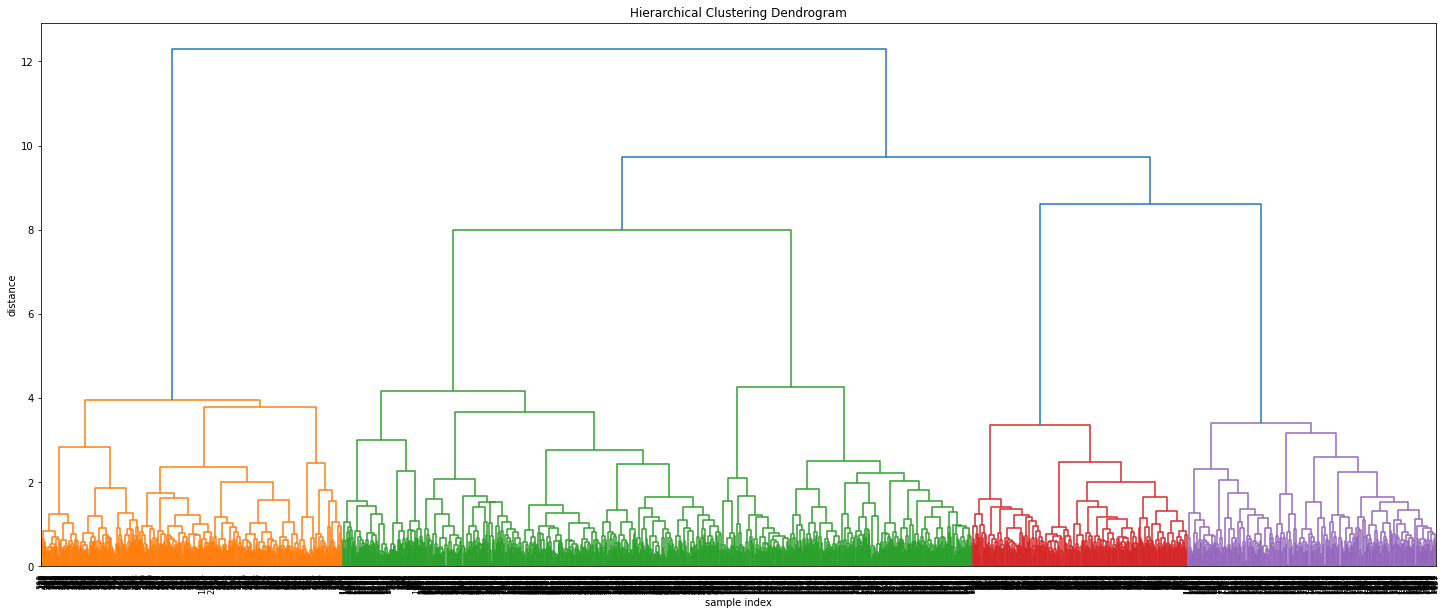

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

matrix_bbc=linkage(X_w2v_bbc, method='ward',metric='euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    matrix_bbc,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 4).fit(X_w2v_bbc)
y_pred_clustering = clustering.labels_
print(round(normalized_mutual_info_score(true_labels_bbc, y_pred_clustering), 3))
print(round(adjusted_rand_score(true_labels_bbc, y_pred_clustering),3))

0.726
0.618


## **Autoencoders**

**An autoencoder is a type of artificial neural network used to learn data encodings in an unsupervised manner.
The aim of an autoencoder is to learn a lower-dimensional representation (encoding) for a higher-dimensional data, typically for dimensionality reduction, by training the network to capture the most important parts of the input data.***

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Dense

**Setting up the encoder, decoder and a model**

In [ ]:
# This is the dimension of the original space
input_dim = 300

# This is the dimension of the latent space (encoding space)
latent_dim = 2

encoder = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(latent_dim, activation='relu')
])

decoder = Sequential([
    Dense(64, activation='relu', input_shape=(latent_dim,)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(input_dim, activation=None)
])
autoencoder_classic4_pca = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder_classic4_pca.compile(loss='mse', optimizer='adam')

In [ ]:
def plot_orig_vs_recon(title='', n_samples=3):
    fig = plt.figure(figsize=(10,6))
    plt.suptitle(title)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        idx = random.sample(range(X_classic4_pca_w2v.shape[0]), 1)
        plt.plot(autoencoder_classic4_pca.predict(X_classic4_pca_w2v[idx]).squeeze(), label='reconstructed' if i == 0 else '')
        plt.plot(X_classic4_pca_w2v[idx].squeeze(), label='original' if i == 0 else '')
        #fig.axes[i].set_xticklabels(metric_names)
        plt.xticks(np.arange(0, 10, 1))
        plt.grid(True)
        if i == 0: plt.legend();


In [ ]:
# model_history = autoencoder_classic4_pca.fit(X_classic4_pca_w2v, X_classic4_pca_w2v, epochs=1000, batch_size=32, verbose=0)

# plt.plot(model_history.history["loss"])
# plt.title("Loss vs. Epoch")
# plt.ylabel("Loss")
# plt.xlabel("Epoch")
# plt.grid(True)

In [ ]:
plot_orig_vs_recon_raw_c4('RAW, CLASSIC4, RECONSTRUCTION')

- **Classic3**

**Let's see how our autoencoder works on Classic3 data**

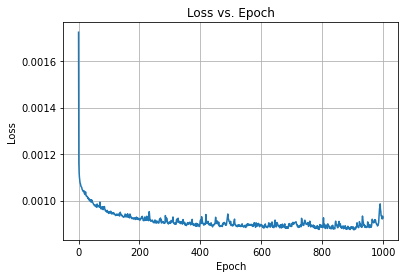

In [ ]:
# This is the dimension of the original space
input_dim_raw = 300

# This is the dimension of the latent space (encoding space)
latent_dim_raw = 2

encoder = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim_raw,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(latent_dim_raw, activation='relu')
])

decoder = Sequential([
    Dense(64, activation='relu', input_shape=(latent_dim_raw,)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(input_dim_raw, activation=None)
])
autoencoder_classic3_raw = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder_classic3_raw.compile(loss='mse', optimizer='adam')


def plot_orig_vs_recon_raw_c3(title='', n_samples=3):
    fig = plt.figure(figsize=(10,6))
    plt.suptitle(title)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        idx = random.sample(range(X_w2v_classic3.shape[0]), 1)
        plt.plot(autoencoder_classic3_raw.predict(X_w2v_classic3[idx]).squeeze(), label='reconstructed' if i == 0 else '')
        plt.plot(X_w2v_classic3[idx].squeeze(), label='original' if i == 0 else '')
        #fig.axes[i].set_xticklabels(metric_names)
        plt.xticks(np.arange(0, 10, 1))
        plt.grid(True)
        if i == 0: plt.legend();

model_history = autoencoder_classic3_raw.fit(X_w2v_classic3, X_w2v_classic3, epochs=1000, batch_size=32, verbose=0)

plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

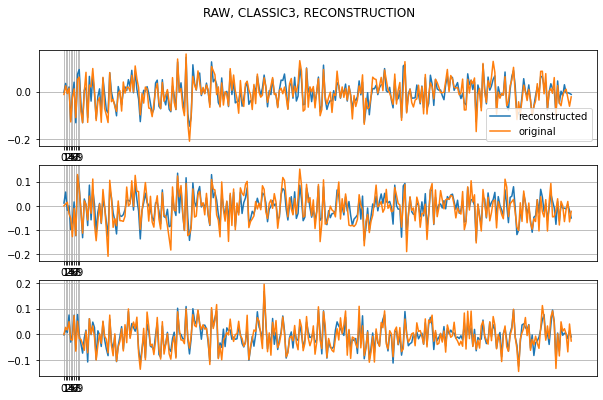

In [ ]:
import random
plot_orig_vs_recon_raw_c3('RAW, CLASSIC3, RECONSTRUCTION')

**As we can observe, the reconstruction is very close to a original data**

- **BBC**

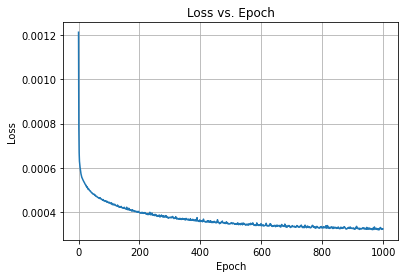

In [ ]:
# This is the dimension of the original space
input_dim_raw = 300

# This is the dimension of the latent space (encoding space)
latent_dim_raw = 2

encoder = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim_raw,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(latent_dim_raw, activation='relu')
])

decoder = Sequential([
    Dense(64, activation='relu', input_shape=(latent_dim_raw,)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(input_dim_raw, activation=None)
])
autoencoder_bbc_raw = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder_bbc_raw.compile(loss='mse', optimizer='adam')


def plot_orig_vs_recon_raw_bbc(title='', n_samples=3):
    fig = plt.figure(figsize=(10,6))
    plt.suptitle(title)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        idx = random.sample(range(X_w2v_bbc.shape[0]), 1)
        plt.plot(autoencoder_bbc_raw.predict(X_w2v_bbc[idx]).squeeze(), label='reconstructed' if i == 0 else '')
        plt.plot(X_w2v_classic3[idx].squeeze(), label='original' if i == 0 else '')
        #fig.axes[i].set_xticklabels(metric_names)
        plt.xticks(np.arange(0, 10, 1))
        plt.grid(True)
        if i == 0: plt.legend();

model_history = autoencoder_bbc_raw.fit(X_w2v_bbc, X_w2v_bbc, epochs=1000, batch_size=32, verbose=0)

plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

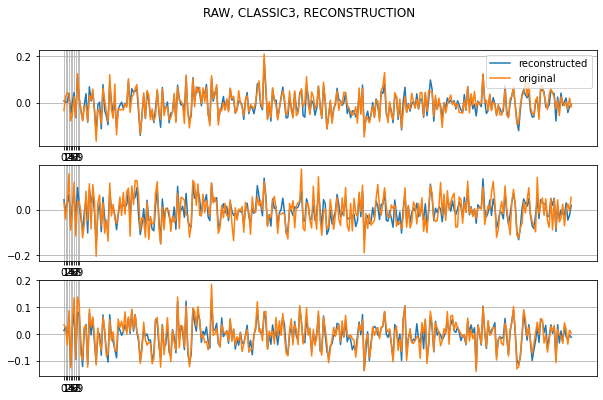

In [ ]:
plot_orig_vs_recon_raw_c3('RAW, CLASSIC3, RECONSTRUCTION')

# Factorial Kmeans and Reduced Kmeans

In [ ]:
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages
from rpy2.robjects import numpy2ri
import rpy2.robjects as robjects

# import R's "base" package
base = importr('base')
# import R's "utils" package
utils = importr('utils')

utils.chooseCRANmirror(ind=1) # select the first mirror in the list
print(base._libPaths())

[1] "/home/laiduy98/miniconda3/envs/ds-37-2/lib/R/library"



In [ ]:
clustrd = importr('clustrd', lib_loc = "/home/laiduy98/R/x86_64-pc-linux-gnu-library/3.6")

In [ ]:
from contextlib import contextmanager
from rpy2.robjects.lib import grdevices
from IPython.display import Image, display

@contextmanager
def r_inline_plot(width=600, height=600, dpi=100):

    with grdevices.render_to_bytesio(grdevices.png, 
                                     width=width,
                                     height=height, 
                                     res=dpi) as b:

        yield

    data = b.getvalue()
    display(Image(data=data, format='png', embed=True))

## Reduced Kmeans

In [ ]:
numpy2ri.activate()
pred_RKM_classic3_glove = clustrd.cluspca(X_classic3_glove_scaled, k_classic3, 2, method = "RKM", rotation = "varimax", scale = False, nstart = 10)

  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |=======                                                               |  10%
  |                                                                            
  |==============                                                        |  20%
  |                                                                            
  |=====================                                                 |  30%
  |                                                                            
  |============================                                          |  40%
  |                                                                            
  |===================================                                   |  50%
  |                                     

In [ ]:
pred_RKM_classic3_glove_py_dict = dict(zip(pred_RKM_classic3_glove.names, map(list,list(pred_RKM_classic3_glove))))

In [ ]:
print(f'NMI score for Glove/Reduce Kmeans/Classic3 is {round(normalized_mutual_info_score(true_labels_classic3, np.array(pred_RKM_classic3_glove_py_dict["cluster"])), 3)}')

NMI score for Glove/Reduce Kmeans/Classic3 is 0.859


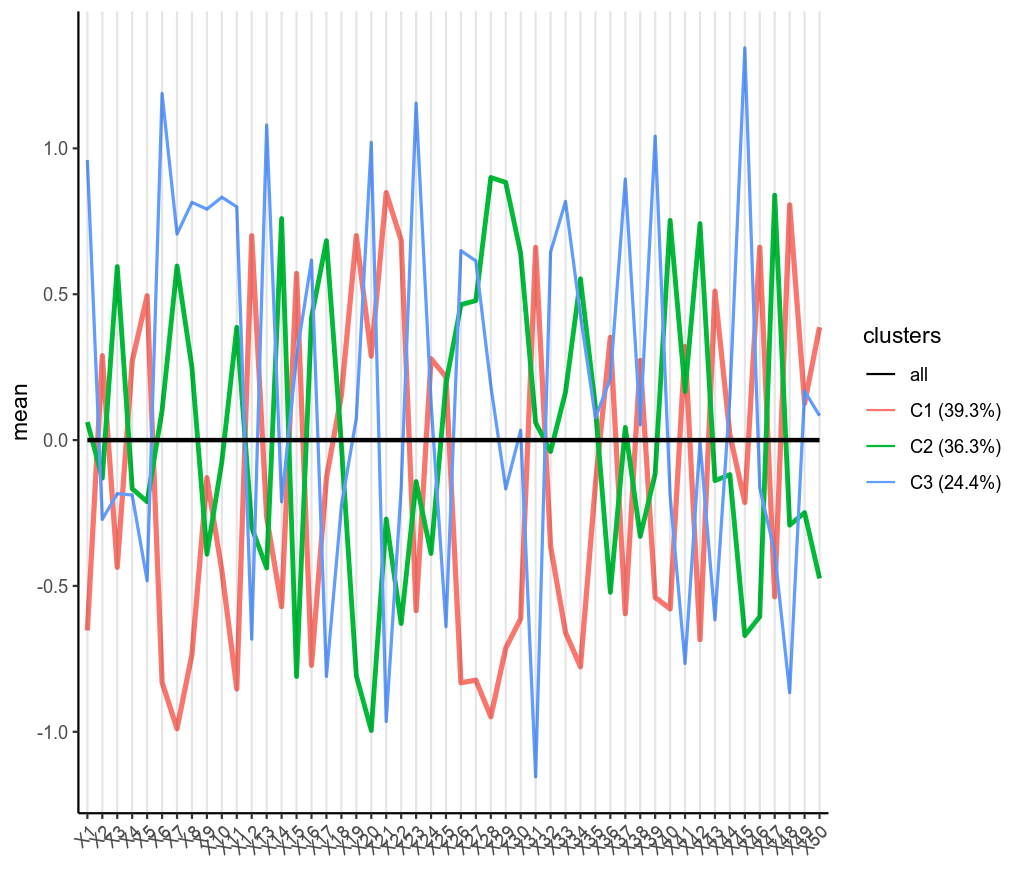

In [ ]:
with r_inline_plot(width=1024, height=896, dpi=150):
    robjects.r.plot(pred_RKM_classic3_glove, cludesc = True)

## Factorial Kmeans

In [ ]:
pred_FKM_classic3_glove = clustrd.cluspca(X_classic3_glove_scaled, k_classic3, 2, method = "FKM", rotation = "varimax", scale = False)

  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |=======                                                               |  10%
  |                                                                            
  |==============                                                        |  20%
  |                                                                            
  |=====================                                                 |  30%
  |                                                                            
  |============================                                          |  40%
  |                                                                            
  |===================================                                   |  50%
  |                                     

In [ ]:
pred_FKM_classic3_glove_py_dict = dict(zip(pred_FKM_classic3_glove.names, map(list,list(pred_FKM_classic3_glove))))

In [ ]:
print(f'NMI score for Glove/Factorial Kmeans/Classic3 is {round(normalized_mutual_info_score(true_labels_classic3, np.array(pred_FKM_classic3_glove_py_dict["cluster"])), 3)}')

NMI score for Glove/Factorial Kmeans/Classic3 is 0.156


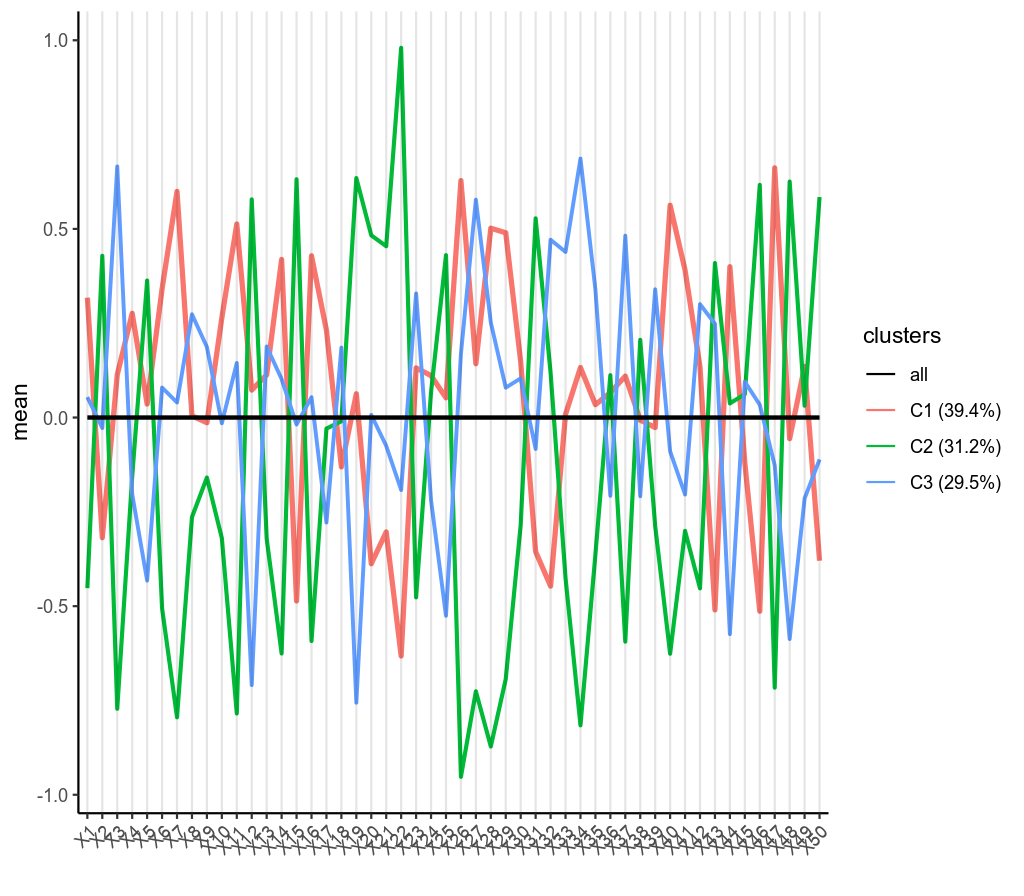

In [ ]:
with r_inline_plot(width=1024, height=896, dpi=150):
    robjects.r.plot(pred_FKM_classic3_glove, cludesc = True)